In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [46]:
df = pd.read_csv(r"C:\Projects\food-delivery-regression\data\processed\food_delivery_processed.csv")

In [47]:
threshold = df['Delivery_Time'].median()
df['Delivery_Status'] = (df['Delivery_Time'] > threshold).astype(int)

In [48]:
X = df.drop(columns=['Delivery_Time', 'Delivery_Status'])

In [49]:
Y = df['Delivery_Status']

In [50]:
X.shape, Y.shape

((200, 18), (200,))

In [51]:
x_train, x_test, y_train, y_test = train_test_split (X,Y,test_size=0.2,random_state=42,stratify=Y)

In [52]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 18), (40, 18), (160,), (40,))

In [53]:
num_cols = [
    'Distance',
    'Delivery_Person_Experience',
    'Restaurant_Rating',
    'Customer_Rating',
    'Order_Cost',
    'Tip_Amount'
]

In [54]:
scaler = StandardScaler()

In [55]:
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [56]:
x_train[num_cols].describe().round(2)

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Order_Cost,Tip_Amount
count,160.00,160.00,160.00,160.00,160.00,160.00
mean,0.00,-0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.64,-1.53,-1.79,-1.51,-1.65,-1.50
25%,-0.73,-0.80,-0.80,-0.93,-0.91,-0.94
50%,-0.15,-0.07,0.05,-0.06,0.00,0.04
75%,0.71,1.03,0.90,0.82,0.90,0.82
max,2.02,1.76,1.74,1.98,1.73,1.82


In [57]:
model = LogisticRegression()

In [58]:
model.fit(x_test,y_test)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [59]:
y_pred = model.predict(x_test)

In [60]:
accuracy_score(y_test, y_pred)

0.775

In [61]:
precision_score(y_test, y_pred)

0.7894736842105263

In [62]:
recall_score(y_test, y_pred)

0.75

In [63]:
f1_score(y_test, y_pred)

0.7692307692307693

In [64]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  4],
       [ 5, 15]])

In [65]:
#   The logistic regression model achieves an accuracy of 77.5% with balanced precision (0.79) and recall (0.75). This indicates the model performs
#   reasonably well in distinguishing delayed vs fast deliveries.
#   The confusion matrix shows a comparable number of false positives and false negatives, suggesting no extreme bias toward either class.  
#   Overall, the model serves as a strong baseline for delivery delay classification.

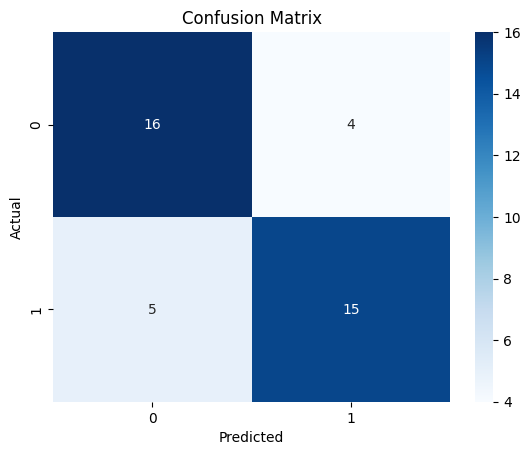

In [66]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()